<a href="https://colab.research.google.com/github/AbbasSalami/ML_Tutorial/blob/main/ML_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import datasets
import random
import time
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, BatchNormalization, Flatten, Conv2D, Conv1D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

# IRIS dataset (DT, SVM, MLP)

Text(0, 0.5, 'sepal_w')

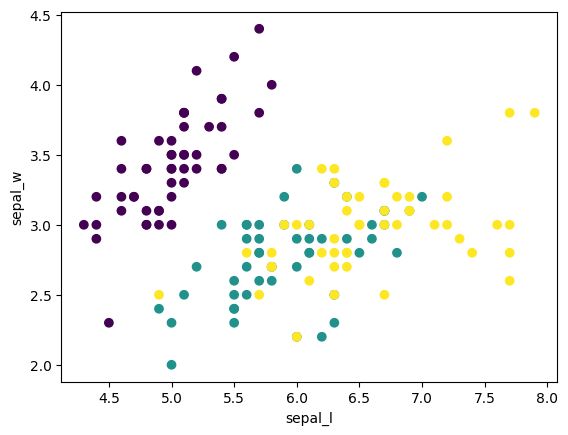

In [68]:
iris = datasets.load_iris()
att_label = ["sepal_l", "sepal_w", "petal_l", "petal_w"]
data = pd.DataFrame(data = np.concatenate((iris["data"], iris["target"][:,np.newaxis]), axis = -1), columns = att_label + ["species"])
# print(data.head())
f1 = "sepal_l"
f2 = "sepal_w"
scatter = plt.scatter(data[f1], data[f2], c = data["species"])
plt.xlabel(f1)
plt.ylabel(f2)

In [73]:
x_train = []
y_train = []
x_test = []
y_test = []
# len(data)
train = random.sample(range(0, len(data)-1), int(0.8*(len(data)-1)))
# for idx in train:
  

# MNIST dataset (SVM, MLP, CNN)

In [ ]:
# Visualise 10 images
def data_vis(input_data, L_idx):
  fig, ax = plt.subplots(1,10, figsize=(12,2))
  for i in L_idx:
    ax[i].imshow(input_data[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

def data_reshape(input_data):
  return input_data.reshape(input_data.shape[0], input_data.shape[1]*input_data.shape[2])

def show_shapes(*args):
  for item in args:
    print(item.shape)
  print("\n")

def one_hot(labels):
  return np_utils.to_categorical(labels, len(np.unique(labels)))


def training_vis(*args):
  fig, ax = plt.subplots(1,len(args), figsize=(12,4))
  for idx, item in enumerate(args):
    ax[idx].plot(100*np.array(item.history['accuracy']), label = "Train")
    ax[idx].plot(100*np.array(item.history['val_accuracy']), label = "Validation")
    ax[idx].legend(loc = "lower right")
    ax[idx].set_xlabel("Iterations")
    ax[idx].set_ylabel("Accuracy (%)")


def vis_misClass(model, input_test, label_test):
  L_wrong = []
  counter = 0
  if len(y_test_hot.shape) == 1:
    y_pred = model.predict(input_test)
  else:
    y_pred = np.argmax(model.predict(input_test),1)
  
  for i in range(len(y_pred)):
    if label_test[i] == y_pred[i]:
      counter += 1
    else:
      L_wrong.append(i)
      
  fig, ax = plt.subplots(1,10, figsize=(12,2))
  for i in L_wrong[:10]:
    ax[counter].imshow(x_test[i], cmap='gray')
    ax[counter].set_xticks([])
    ax[counter].set_yticks([])
    counter += 1


def vis_misClass(model, input_test, label_test, input_img):
  if len(label_test.shape) == 1:
    y_pred = model.predict(input_test)
  else:
    y_pred = np.argmax(model.predict(input_test),1)
    label_test = np.argmax(label_test,1)
  
  L_wrong = []
  counter = 0
  for i in range(len(y_pred)):
    if label_test[i] == y_pred[i]:
      counter += 1
    else:
      L_wrong.append(i)
      
  k = min(len(L_wrong), 10)
  L_wrong = random.sample(L_wrong, k)
  counter = 0
  fig, ax = plt.subplots(1,k, figsize=(12,2))
  for i in L_wrong:
    ax[counter].imshow(input_img[i], cmap='gray')
    ax[counter].set_xticks([])
    ax[counter].set_yticks([])
    counter += 1

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
data_vis(x_train, range(10))

# Select a subset of data
# x_train = x_train[:5000]
# y_train = y_train[:5000]
# x_test = x_test[:100]
# y_test = y_test[:100]

# Create train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Normalising our data points
x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255

# Reshape images to train conventional ML algorithm and MLP
x_train_vec = data_reshape(x_train)
x_val_vec = data_reshape(x_val)
x_test_vec = data_reshape(x_test)

# Reshape images to train CNN
x_train_img = np.expand_dims(x_train, axis=3)
x_val_img = np.expand_dims(x_val, axis=3)
x_test_img = np.expand_dims(x_test, axis=3)

# Showing shape of our data
show_shapes(x_train_vec, x_train_img, y_train)

# One-hot encoding
y_train_hot = one_hot(y_train)
y_val_hot = one_hot(y_val)
y_test_hot = one_hot(y_test)

In [ ]:
# Initialising support vector machine 
model_svm = svm.SVC()

# Initialising multilayer perceptron
Input_block = Input(shape = (x_train_vec.shape[-1]))
out = Dense(512, activation = 'relu')(Input_block)
out = Dense(256, activation = 'relu')(out)
out = Dense(10, activation = 'softmax')(out)
model_MLP = Model(inputs = Input_block, outputs = out)

# Initialising convolutional neural network
Input_block = Input(shape = (x_train_img.shape[1:]))
out = Conv2D(32, kernel_size=(3, 3), activation='relu')(Input_block)
out = MaxPooling2D(pool_size=(2, 2))(out)
out = Flatten()(out)
out = Dense(128, activation='relu')(out)
out = Dropout(0.5)(out)
out = Dense(10, activation = 'softmax')(out)
model_CNN = Model(inputs = Input_block, outputs = out)


In [ ]:
# Visualise MLP architecture
print("\MLP model\n")
model_MLP.summary()
plot_model(model_MLP, show_shapes=True)

In [ ]:
# Visualise CNN architecture
print("\nCNN model\n")
model_CNN.summary()
plot_model(model_CNN, show_shapes=True)

In [ ]:
# Training SVM
print("Training a support vector machine ...")
model_svm.fit(x_train_vec, y_train)

In [ ]:
# Training MLP
print("Training a multilayer perceptron ...")
model_MLP.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
fittedModel_MLP = model_MLP.fit(x_train_vec, y_train_hot, batch_size = 32, epochs = 20, verbose = 1, validation_data=(x_val_vec, y_val_hot))

In [ ]:
# Training CNN
print("Training a convolutional neural network ...")
model_CNN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
fittedModel_CNN = model_CNN.fit(x_train_img, y_train_hot, batch_size = 32, epochs = 20, verbose = 1, validation_data=(x_val_img, y_val_hot))

In [ ]:
# Visualising the training process 
training_vis(fittedModel_MLP, fittedModel_CNN)

In [ ]:
# Evaluating models and comparison on the test data
score_svm = model_svm.score(x_test_vec, y_test)
score_MLP = model_MLP.evaluate(x_test_vec, y_test_hot, verbose=0)
score_CNN = model_CNN.evaluate(x_test_img, y_test_hot, verbose=0)

print("The SVM test accuracy:", round(score_svm*100,1), "%")
print("The MLP test accuracy:", round(score_MLP[1]*100,1), "%")
print("The CNN test accuracy:", round(score_CNN[1]*100,1), "%")

In [ ]:
print("\nMisclassified samples by SVM\n")
vis_misClass(model_svm, x_test_vec, y_test, x_test)

In [ ]:
print("\nMisclassified samples by MLP\n")
vis_misClass(model_MLP, x_test_vec, y_test_hot, x_test)

In [ ]:
print("\nMisclassified samples by CNN\n")
vis_misClass(model_CNN, x_test_img, y_test_hot, x_test)